In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color
import os 
import cv2
import PIL, PIL.Image
import tensorflow as tf
from tensorflow import keras
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras import backend as K
import numpy as np
import matplotlib.image as mpimg
import os
import random
from icrawler.builtin import GoogleImageCrawler
from keras.layers import Input, Concatenate, Dense


In [2]:
import requests
import os

url = "https://www.pexels.com/search/rosy/"
#url = "https://pixabay.com/images/search/daisy/"
#url = "https://www.pexels.com/search/rose/"
#url = "https://www.pexels.com/search/rose%20flower/"
#url = "https://www.pexels.com/search/rose%20flowers/"
#url = "https://www.pexels.com/search/rose%20roses/"
#url = "https://www.pexels.com/search/rose%20roses%20flower/"
#url = "https://www.pexels.com/search/rose%20roses%20flowers/"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


response = requests.get(url, headers=headers)

image_urls = []
for line in response.content.decode().splitlines():
    if 'https://images.pexels.com/photos/' in line:
        image_url = line.split('"')[1]
        image_urls.append(image_url)

# create a directory to save the images
if not os.path.exists('rosy'): #this just a sample, I re-create the directory every time I do with a new search
    os.makedirs('rosy')



for i, image_url in enumerate(image_urls):
    filename = f'roses/{i+1}.jpg'
    response = requests.get(image_url, headers=headers)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f'Downloaded {filename}')

In [3]:
#using google image crawler to download images
# google_crawler = GoogleImageCrawler(
#     storage={'root_dir': 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\Flowers\Roses'})

# google_crawler.crawl(
#     keyword='bo hoa hong dep', max_num=820
# )
# count = 0 
# for filename in os.listdir('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\Flowers\Roses'):
#     count += 1
# print(count)

In [4]:
dtset = tf.keras.utils.image_dataset_from_directory('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupProject\Flowers')

Found 4621 files belonging to 8 classes.


In [5]:
#convert to numpy array
dtset_iterator = dtset.as_numpy_iterator()
batch = dtset_iterator.next()
dtset_iterator.next()
print(dtset_iterator.next()[0].shape)

(32, 256, 256, 3)


In [6]:
#resize the image
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    return resized_image
resize_image(batch[0][0], 256, 256)

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

C:\Users\Admin\AppData\Local\Temp\ipykernel_11776\700069525.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


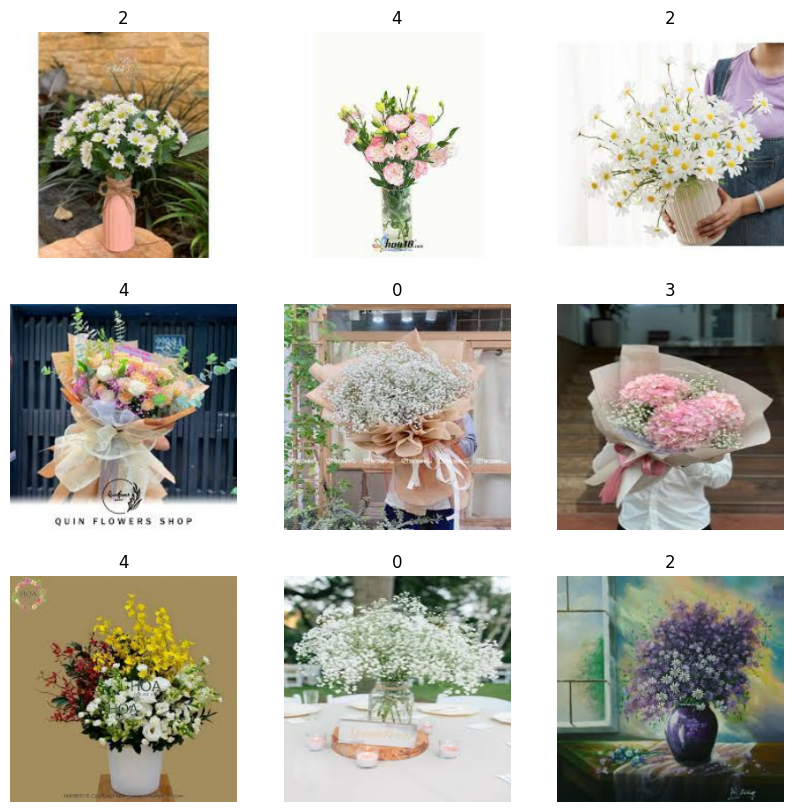

In [7]:
# display 
fix, ax = plt.subplots(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(batch[0][i].astype('uint8'))
    plt.title(batch[1][i])
    plt.axis('off')
plt.show()


In [8]:
#standardlize pixel values using pillow 
def standardlize_image(image):
    normalized_image = (image - np.mean(image)) / np.std(image)
    return normalized_image
standardlize_image(batch[0][0])

#Reshape the image: 
def reshape_image(image):
    reshaped_image = image.reshape(-1)
    return reshaped_image

reshape_image(batch[0][0])



array([255., 255., 255., ..., 255., 255., 255.], dtype=float32)

In [9]:
len(dtset)

145

In [10]:
# #using kfold to split the dataset
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# for train_index, test_index, val_index in kf.split(dtset):
#     print("TRAIN:", train_index, "TEST:", test_index, "VAL:", val_index)
#     X_train, X_test, X_val = dtset[train_index], dtset[test_index], dtset[val_index]
#     y_train, y_test, y_val = dtset[train_index], dtset[test_index], dtset[val_index]
    

In [11]:
#split into train and validation , test set
train_size = int (0.6 * len(dtset))
val_size = int (0.2 * len(dtset))
test_size = int (0.2 * len(dtset))

train = dtset.take(train_size)
val = dtset.skip(train_size).take(val_size)
test = dtset.skip(train_size + val_size).take(test_size)
print(len(train), len(test), len(val))



87 29 29


In [12]:

# Define two input layers
input1 = Input(shape=(None,1))
input2 = Input(shape=(None,8))

# Concatenate the inputs
concatenated = Concatenate()([input1, input2])

# Define a dense output layer
output = Dense(1)(concatenated)

# Define the model
model = tf.keras.models.Model(inputs=[input1, input2], outputs=output)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 8)]    0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, None, 9)      0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, None, 1)      10          ['concatenate[0][0]']        

In [13]:
model = Sequential()
model.add(Conv2D(128, (3, 3), 1, input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), 2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), 3,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu')) #128 neurons
model.add(Dense(1, activation='sigmoid')) #1 neuron
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0

In [14]:
tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0

In [17]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


87/87 [==============================] - 124s 1s/step - loss: 0.0000e+00 - accuracy: 0.0758 - val_loss: 0.0000e+00 - val_accuracy: 0.0711
Epoch 2/10
87/87 [==============================] - 137s 2s/step - loss: 0.0000e+00 - accuracy: 0.0761 - val_loss: 0.0000e+00 - val_accuracy: 0.0744
Epoch 3/10
87/87 [==============================] - 132s 2s/step - loss: 0.0000e+00 - accuracy: 0.0747 - val_loss: 0.0000e+00 - val_accuracy: 0.0711
Epoch 4/10
87/87 [==============================] - 130s 1s/step - loss: 0.0000e+00 - accuracy: 0.0736 - val_loss: 0.0000e+00 - val_accuracy: 0.0679
Epoch 5/10
87/87 [==============================] - 123s 1s/step - loss: 0.0000e+00 - accuracy: 0.0758 - val_loss: 0.0000e+00 - val_accuracy: 0.0722
Epoch 6/10
87/87 [==============================] - 117s 1s/step - loss: 0.0000e+00 - accuracy: 0.0736 - val_loss: 0.0000e+00 - val_accuracy: 0.0690
Epoch 7/10
87/87 [==============================] - 117s 1s/step - loss: 0.0000e+00 - accuracy: 0.0754 - val_loss: 0.

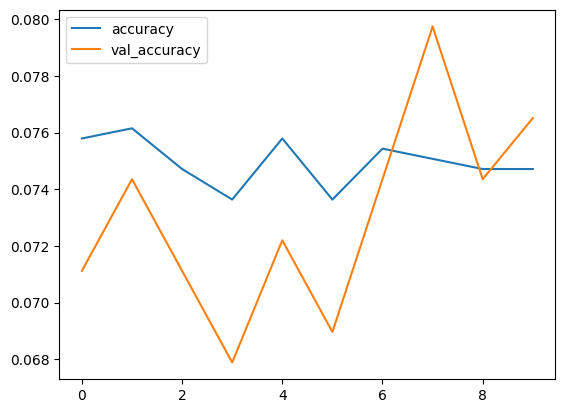

In [32]:
#accuracy between val and train
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend()
plt.show()

In [29]:
#import module from tensorflow
from keras.metrics import BinaryAccuracy, Precision, Recall

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
from sklearn.metrics import classification_report
for batch in test.as_numpy_iterator():
    images, labels = batch
    yhat = model.predict(images)
    yhat = np.argmax(yhat, axis=1)
    
    pre.update_state(labels, yhat)
    re.update_state(labels, yhat)
    acc.update_state(labels, yhat)

1/1 [==============================] - 0s 164ms/step


In [31]:
print('Precision: ', pre.result().numpy())
print('Recall: ', re.result().numpy())
print('Accuracy: ', acc.result().numpy())

Precision:  0.0
Recall:  0.0
Accuracy:  0.21342134


0 diem :)))

In [ ]:
#import precision, recall,  f1-score


In [ ]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# def train_flower_classifier():
#     # Load the dataset and apply transformations
#     train_datagen = keras.preprocessing.image.ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

#     train_generator = train_datagen.flow_from_directory(
#         'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupProject\Flowers',
#         target_size=(224, 224),
#         batch_size=32,
#         class_mode='categorical')

#     # Define the model architecture
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dropout(0.5))
#     model.add(Dense(512, activation='relu'))
#     model.add(Dense(5, activation='softmax'))

#     # Compile the model
#     model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     # Train the model
#     model.fit(train_generator, epochs=10)

# train_flower_classifier()

In [ ]:
# #define model with keras
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(256, 256, 3)),
#     keras.layers.Dense(4621 , activation='relu'),
# ])

# #compile model
# model.compile(optimizer='adam',              
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])


In [ ]:
# #train the model
# logdir = 'logs'
# tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# model.fit(train, epochs=10, validation_data=val)
# #plot the performance of the model
# plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()
